In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from scipy.misc import imresize
import glob
from visualize import make_dot
import numpy as np
from utils import BoxCar

Using TensorFlow backend.


In [2]:
def plot_data_img(img):
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(img)
    
    plt.show()

In [3]:
def get_img_array(path, target_dim=(299,299)):
    """
    Given path of image, returns it's numpy array
    """
    return img_to_array(load_img(path, target_size=target_dim))/255.0

In [4]:
# one image
img_path = '/home/birdsnap/CUB_200_2011/cropped_test/validation/200.Common_Yellowthroat/Common_Yellowthroat_0092_190573.jpg'
img = get_img_array(img_path)
img_v1 = torch.autograd.Variable(torch.Tensor(img).view(1,299,299,3)).permute(0, 3, 1, 2)

img_path = '/home/birdsnap/CUB_200_2011/cropped_test/validation/200.Common_Yellowthroat/Common_Yellowthroat_0075_190900.jpg'
img = get_img_array(img_path)
img_v2 = torch.autograd.Variable(torch.Tensor(img).view(1,299,299,3)).permute(0, 3, 1, 2)
img_v = torch.cat([img_v1, img_v2], 0)

In [5]:
m = np.array([0, 0, 200, 200, 100, 100, 250, 250, 50, 50, 150, 150, 0, 0, 200, 200, 100, 100, 250, 250, 50, 50, 150, 150])
m = torch.autograd.Variable(torch.from_numpy(m).view(2, 3, -1))

In [6]:
bc = BoxCar(use_gpu=False)

In [7]:
res = bc(img_v, m)

In [11]:
def logistic(x, k):
    return 1.0/(1 + torch.exp(-k * x))

In [12]:
def box_car(x, m, k):
    s = x.size(0)
    g = m.size(1)
    ch = x.size(1)
    dim1 = x.size(2)
    dim2 = x.size(3)
    
    f1 = torch.autograd.Variable(torch.from_numpy(np.arange(dim1)).view(1, 1, 1, dim1, -1).float())
    f2 = torch.autograd.Variable(torch.from_numpy(np.arange(dim2)).view(1, 1, 1, 1, -1).float())
    z1 = torch.autograd.Variable(torch.zeros(ch*dim1).long().view(1, 1, ch, dim1, -1).float())
    z2 = torch.autograd.Variable(torch.zeros(ch*dim2).long().view(1, 1, ch, 1, -1).float())
    f1 = f1 + z1
    f2 = f2 + z2
    M = []
    for i in range(g):
        m1 = logistic((f1 - m[:, i, 0].contiguous().view(s, 1, 1, 1, -1)).float(), k)
        
        m2 = logistic((f1 - m[:, i, 2].contiguous().view(s, 1, 1, 1, -1)).float(), k)
        m3 = logistic((f2 - m[:, i, 1].contiguous().view(s, 1, 1, 1, -1)).float(), k)
        m4 = logistic((f2 - m[:, i, 3].contiguous().view(s, 1, 1, 1, -1)).float(), k)
        v = (m1-m2)*(m3-m4)
        M.append(v)
    
    M = torch.cat(M, 1)
    y = x.view(s, 1, ch, dim1, dim2)
    return x.view(s, 1, ch, dim1, -1) * M, y
        
        

In [13]:
res, y = box_car(img_v, m, 10000000)

TypeError: sub received an invalid combination of arguments - got (torch.LongTensor), but expected one of:
 * (float value)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.LongTensor[0m)
 * (torch.FloatTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.LongTensor[0m)
 * (float value, torch.FloatTensor other)


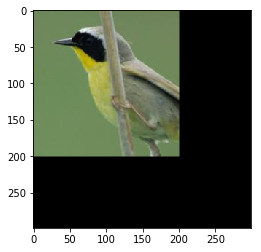

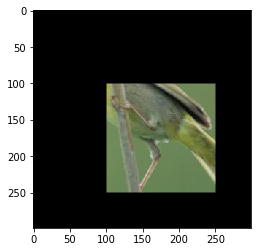

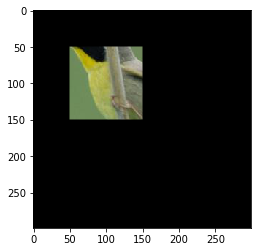

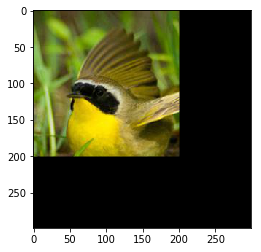

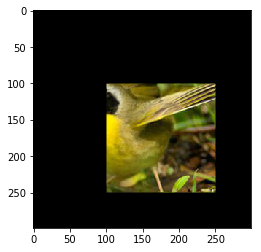

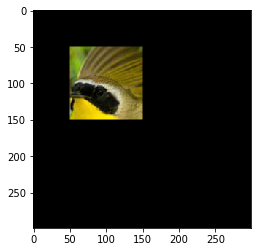

In [8]:
for i in range(2):
    for j in range(3):
        data = res[i, j, :, :, :].permute(1, 2, 0).data.numpy()
        plt.imshow(data)
        plt.show()

In [ ]:
print y.size()

In [ ]:
k = y[0, 0, :, :, :].data.numpy().T

In [ ]:
plt.imshow(img)
plt.show()